In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


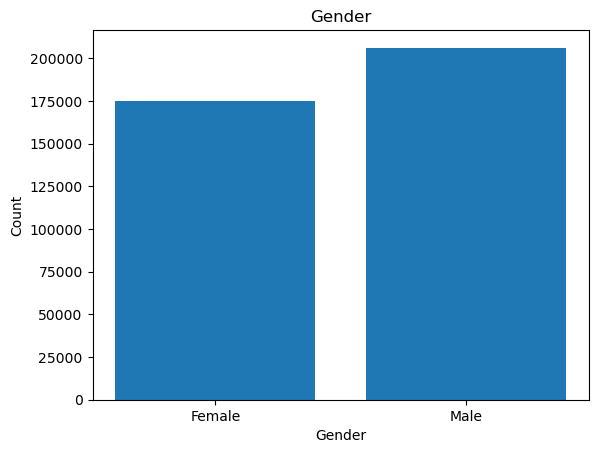

In [4]:
value_counts = train["Gender"].value_counts()
sorted_counts = value_counts.sort_index()
plt.bar(sorted_counts.index, sorted_counts.values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender")
plt.show()

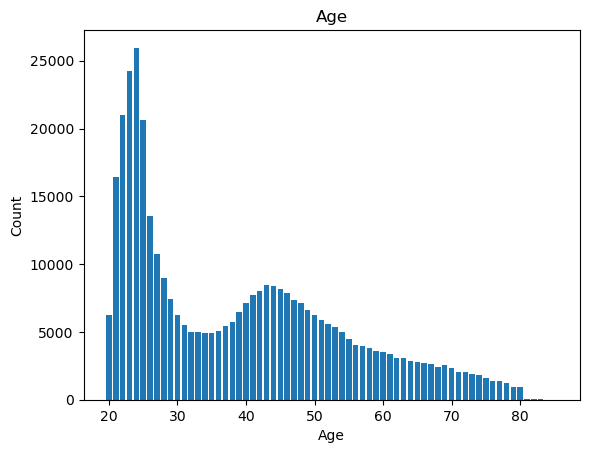

In [5]:
value_counts = train["Age"].value_counts()
sorted_counts = value_counts.sort_index()
plt.bar(sorted_counts.index, sorted_counts.values)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age")
plt.show()

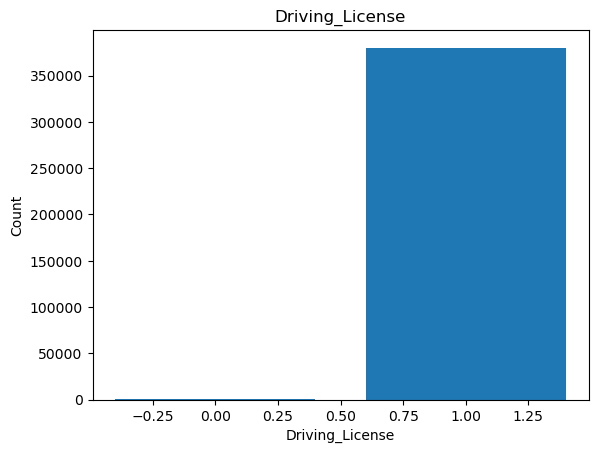

In [6]:
value_counts = train["Driving_License"].value_counts()
sorted_counts = value_counts.sort_index()
plt.bar(sorted_counts.index, sorted_counts.values)
plt.xlabel("Driving_License")
plt.ylabel("Count")
plt.title("Driving_License")
plt.show()

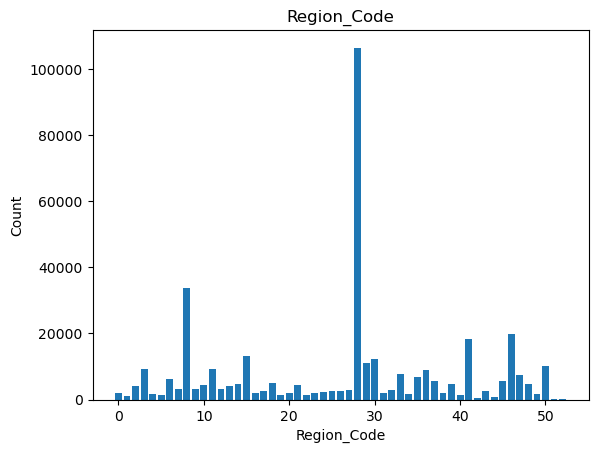

In [7]:
value_counts = train["Region_Code"].value_counts()
sorted_counts = value_counts.sort_index()
plt.bar(sorted_counts.index, sorted_counts.values)
plt.xlabel("Region_Code")
plt.ylabel("Count")
plt.title("Region_Code")
plt.show()

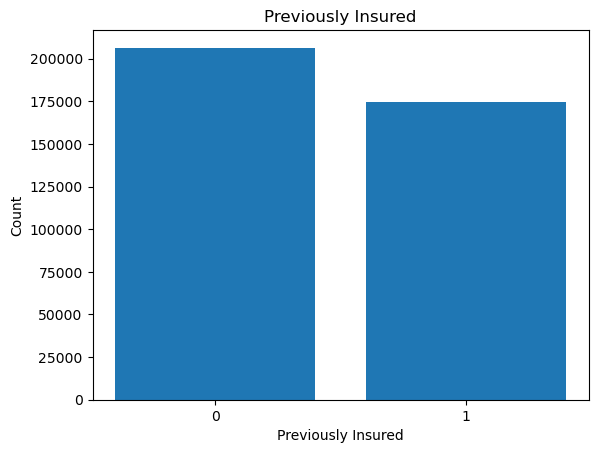

In [8]:
value_counts = train["Previously_Insured"].value_counts()
sorted_counts = value_counts.sort_index()
plt.bar(sorted_counts.index, sorted_counts.values)
plt.xticks(sorted_counts.index)
plt.xlabel("Previously Insured")
plt.ylabel("Count")
plt.title("Previously Insured")
plt.show()

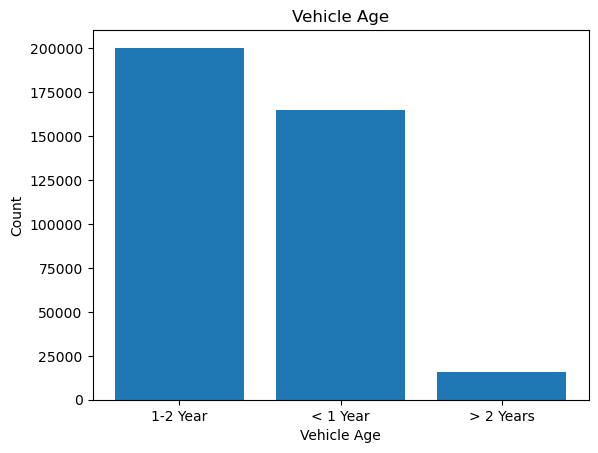

In [9]:
value_counts = train["Vehicle_Age"].value_counts()
sorted_counts = value_counts.sort_index()
plt.bar(sorted_counts.index, sorted_counts.values)
plt.xlabel("Vehicle Age")
plt.ylabel("Count")
plt.title("Vehicle Age")
plt.show()

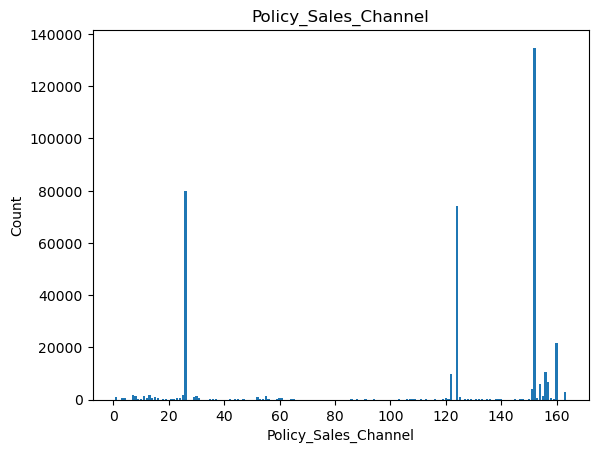

In [10]:
value_counts = train["Policy_Sales_Channel"].value_counts()
sorted_counts = value_counts.sort_index()
plt.bar(sorted_counts.index, sorted_counts.values)
plt.xlabel("Policy_Sales_Channel")
plt.ylabel("Count")
plt.title("Policy_Sales_Channel")
plt.show()

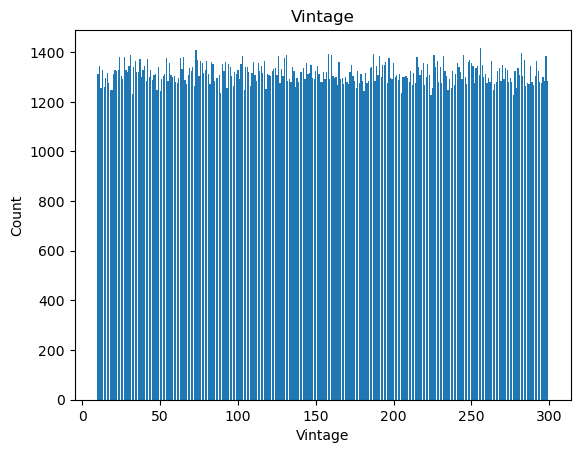

In [11]:
value_counts = train["Vintage"].value_counts()
sorted_counts = value_counts.sort_index()
plt.bar(sorted_counts.index, sorted_counts.values)
plt.xlabel("Vintage")
plt.ylabel("Count")
plt.title("Vintage")
plt.show()

In [12]:
response_female = train[(train["Gender"] == "Female") & (train["Response"] == 1)]
no_response_female = train[(train["Gender"] == "Female") & (train["Response"] == 0)]
female = train[train["Gender"] == "Female"]


response_male = train[(train["Gender"] == "Male") & (train["Response"] == 1)]
no_response_male = train[(train["Gender"] == "Male") & (train["Response"] == 0)]
male = train[train["Gender"] == "Male"]

In [13]:
response_female

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
10,11,Female,47,1,35.0,0,1-2 Year,Yes,47576.0,124.0,46,1
19,20,Female,60,1,33.0,0,1-2 Year,Yes,32363.0,124.0,102,1
26,27,Female,51,1,28.0,0,1-2 Year,Yes,38341.0,124.0,49,1
69,70,Female,50,1,41.0,0,1-2 Year,Yes,2630.0,26.0,81,1
...,...,...,...,...,...,...,...,...,...,...,...,...
381031,381032,Female,49,1,28.0,0,> 2 Years,Yes,33891.0,4.0,98,1
381061,381062,Female,41,1,28.0,0,1-2 Year,Yes,37377.0,124.0,99,1
381073,381074,Female,46,1,28.0,0,1-2 Year,Yes,34741.0,124.0,167,1
381075,381076,Female,61,1,28.0,0,1-2 Year,Yes,43875.0,26.0,139,1


In [14]:
no_response_female

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0
11,12,Female,24,1,50.0,1,< 1 Year,No,48699.0,152.0,289,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381099,381100,Female,51,1,28.0,0,1-2 Year,Yes,44504.0,26.0,71,0
381100,381101,Female,29,1,28.0,0,< 1 Year,Yes,49007.0,124.0,137,0
381101,381102,Female,70,1,28.0,0,> 2 Years,Yes,50904.0,122.0,215,0
381102,381103,Female,25,1,41.0,1,< 1 Year,Yes,2630.0,152.0,102,0


In [15]:
response_male

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
15,16,Male,37,1,6.0,0,1-2 Year,Yes,2630.0,156.0,147,1
29,30,Male,57,1,11.0,0,1-2 Year,Yes,25679.0,157.0,232,1
57,58,Male,54,1,28.0,0,1-2 Year,Yes,25205.0,26.0,283,1
...,...,...,...,...,...,...,...,...,...,...,...,...
380966,380967,Male,52,1,28.0,0,> 2 Years,Yes,52740.0,124.0,271,1
380969,380970,Male,50,1,8.0,0,1-2 Year,Yes,43214.0,7.0,48,1
380987,380988,Male,28,1,47.0,0,1-2 Year,Yes,24961.0,154.0,164,1
381026,381027,Male,36,1,34.0,0,1-2 Year,Yes,31408.0,124.0,32,1


In [16]:
no_response_male

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
13,14,Male,76,1,28.0,0,1-2 Year,Yes,36770.0,13.0,15,0
14,15,Male,71,1,28.0,1,1-2 Year,No,46818.0,30.0,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381103,381104,Male,47,1,50.0,0,1-2 Year,Yes,39831.0,26.0,235,0
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0


In [17]:
print("Male: ", (len(response_male)/len(male))*100)
print("Female: ", (len(response_female)/len(female))*100)

Male:  13.84110748268952
Female:  10.390241115301109


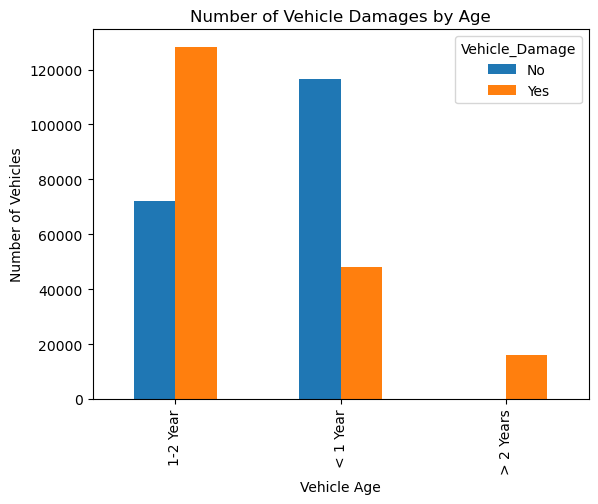

In [18]:
grouped_data = train.groupby("Vehicle_Age")["Vehicle_Damage"].value_counts().unstack().fillna(0)
grouped_data.plot(kind='bar', stacked=False)
plt.xlabel("Vehicle Age")
plt.ylabel("Number of Vehicles")
plt.title("Number of Vehicle Damages by Age")
plt.show()

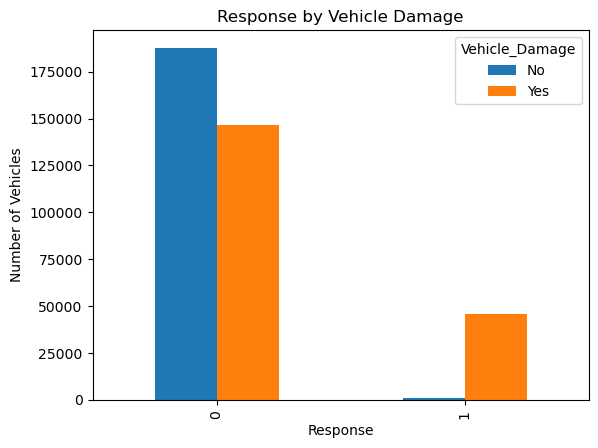

In [19]:
grouped_data = train.groupby("Response")["Vehicle_Damage"].value_counts().unstack().fillna(0)
grouped_data.plot(kind='bar', stacked=False)
plt.xlabel("Response")
plt.ylabel("Number of Vehicles")
plt.title("Response by Vehicle Damage")
plt.show()

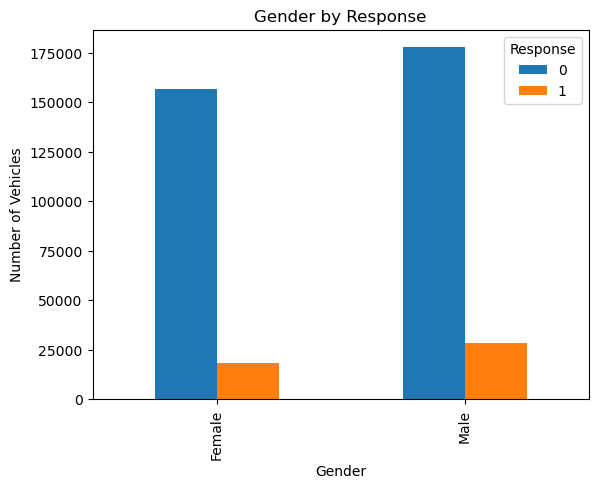

In [20]:
grouped_data = train.groupby("Gender")["Response"].value_counts().unstack().fillna(0)
grouped_data.plot(kind='bar', stacked=False)
plt.xlabel("Gender")
plt.ylabel("Number of Vehicles")
plt.title("Gender by Response")
plt.show()

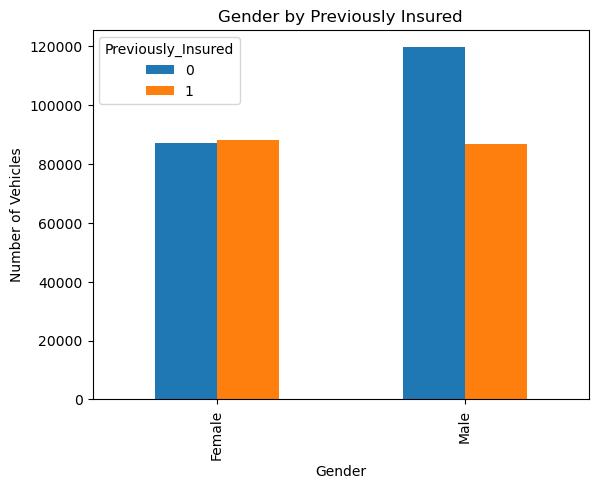

In [21]:
grouped_data = train.groupby("Gender")["Previously_Insured"].value_counts().unstack().fillna(0)
grouped_data.plot(kind='bar', stacked=False)
plt.xlabel("Gender")
plt.ylabel("Number of Vehicles")
plt.title("Gender by Previously Insured")
plt.show()

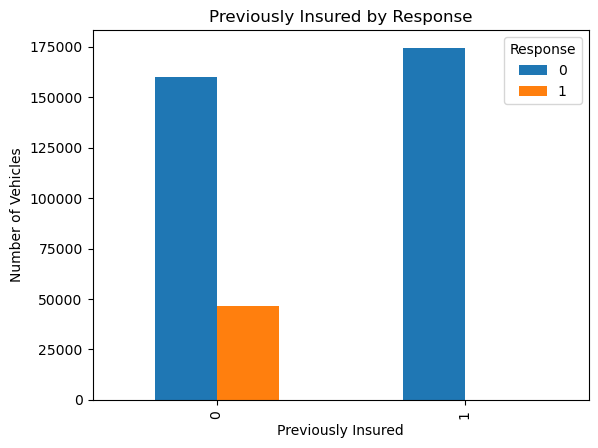

In [22]:
grouped_data = train.groupby("Previously_Insured")["Response"].value_counts().unstack().fillna(0)
grouped_data.plot(kind='bar', stacked=False)
plt.xlabel("Previously Insured")
plt.ylabel("Number of Vehicles")
plt.title("Previously Insured by Response")
plt.show()

In [23]:
label_encoder = LabelEncoder()

In [24]:
train["Gender"] = label_encoder.fit_transform(train["Gender"])
train["Vehicle_Age"] = label_encoder.fit_transform(train["Vehicle_Age"])
train["Vehicle_Damage"] = label_encoder.fit_transform(train["Vehicle_Damage"])

In [25]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [26]:
X = train.drop("Response", axis=1)
Y = train["Response"]

In [27]:
X

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [29]:
smote = SMOTE(random_state=42)

In [30]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [31]:
model = RandomForestClassifier(random_state=42)

In [32]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10]
}

In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Confusion Matrix")
plt.show()